### Dataset link: https://polyp.grand-challenge.org/Databases/

In [2]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage import io
import tifffile as tiff
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from skimage.segmentation import mark_boundaries, find_boundaries


ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "CVC-ClinicDB"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))

['Original', 'Ground Truth']


In [3]:
# Read data
img_files = next(os.walk("{}/Original".format(DATASET_PATH)))[2]
msk_files = next(os.walk("{}/Ground Truth".format(DATASET_PATH)))[2]

img_files.sort()
msk_files.sort()

print(len(img_files))
print(len(msk_files))

612
612


In [4]:
IMG_DIM = (192, 256)

images_rs = []
masks_rs = []

for img_fl, mask_fl in zip(img_files, msk_files):    
    
    img = tiff.imread('{}/Original/{}'.format(DATASET_PATH, img_fl))
    img = resize(img, IMG_DIM, mode='constant')
    images_rs.append(img)


    mask = tiff.imread('{}/Ground Truth/{}'.format(DATASET_PATH, mask_fl))
    mask = np.expand_dims(resize(mask, IMG_DIM).round(), axis=-1)
    masks_rs.append(mask)

    
images_rs = np.array(images_rs)
masks_rs = np.array(masks_rs)
images_rs.shape, masks_rs.shape

((612, 192, 256, 3), (612, 192, 256, 1))

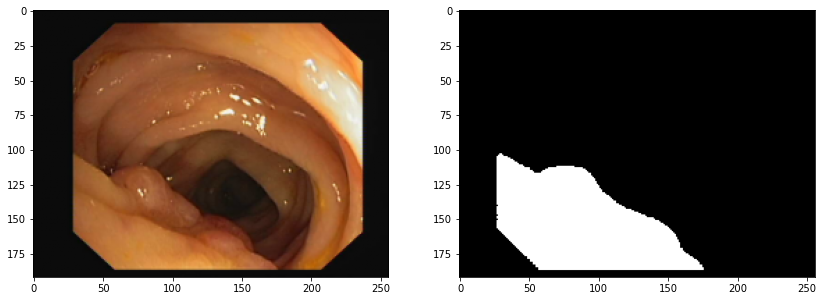

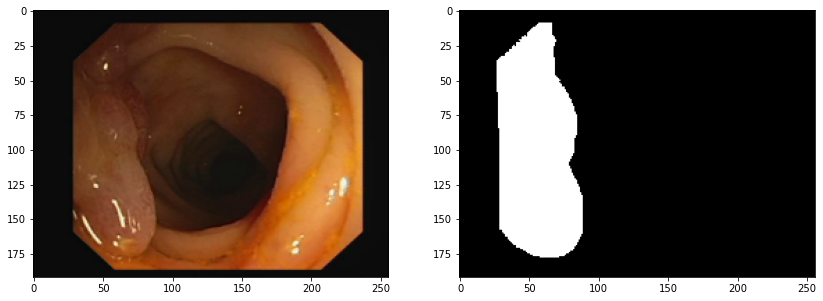

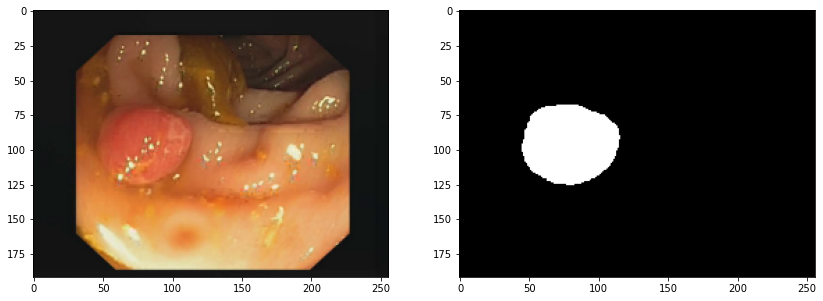

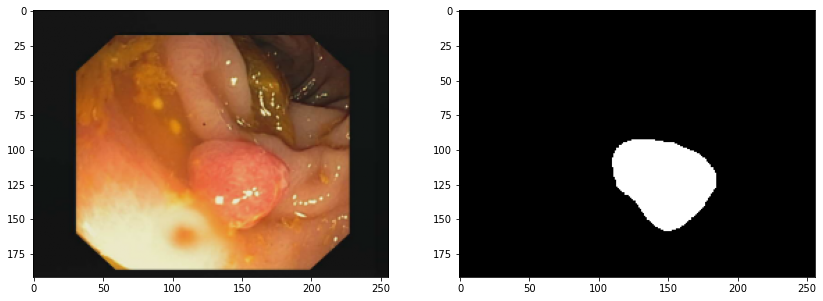

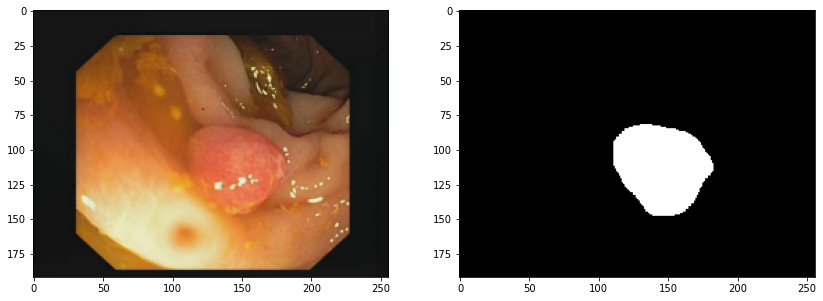

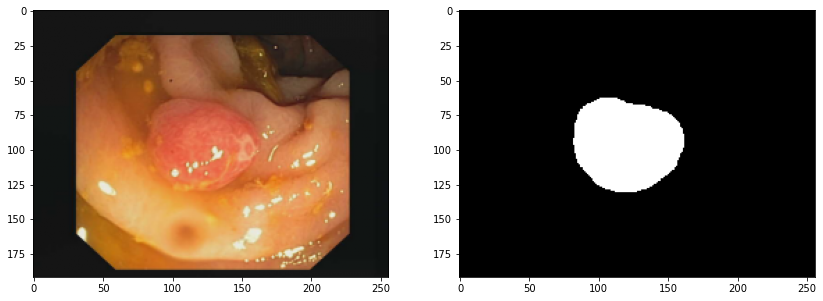

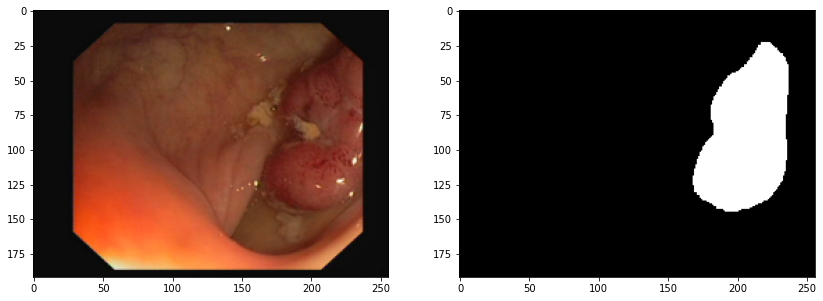

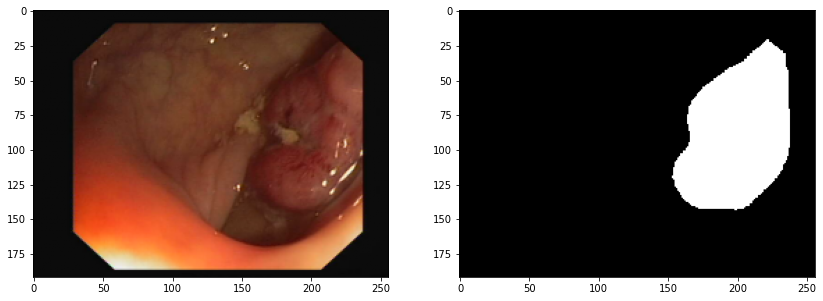

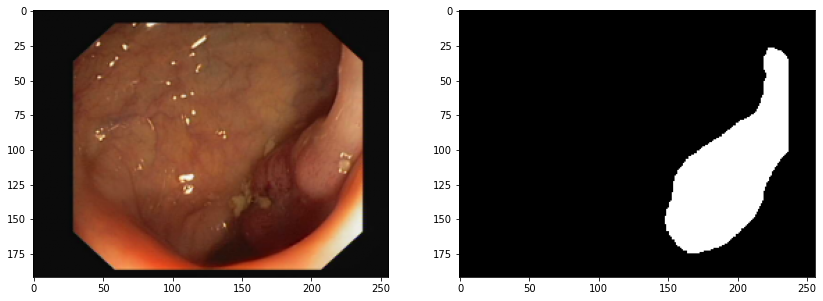

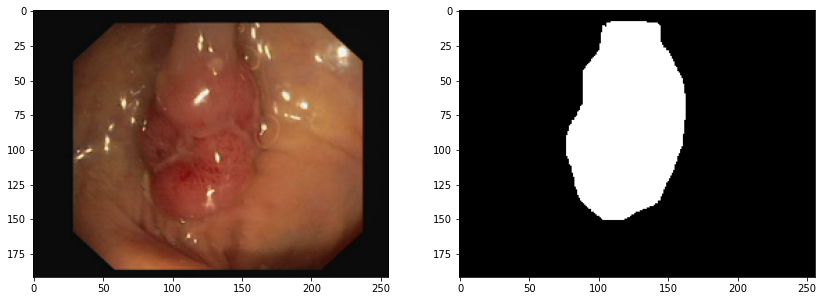

In [5]:
for img, mask in zip(images_rs[:10], masks_rs[:10]):
    
    mask = np.squeeze(mask, axis=-1) # change to H, W
    
    
    fig,_ = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    fig.axes[0].imshow(img)
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()

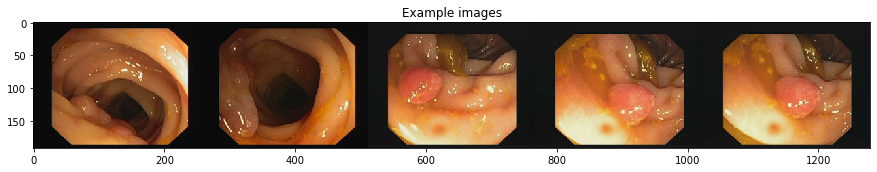

In [6]:
# Plot images
plt.rcParams['figure.figsize'] = (15, 5)
plt.title("Example images")
plt.figsize=(14,12)
plt.imshow(np.concatenate(images_rs[:5].transpose((0,1,2,3)),axis=1), interpolation='none')

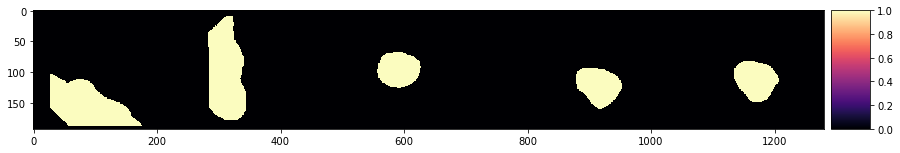

In [7]:
# Plot masks
fig = plt.figure(1, figsize=(15, 5))
ax = plt.gca()
im = ax.imshow(np.concatenate(masks_rs[:5,:,:,0],axis=1), cmap='magma', interpolation='none') # cmap='bwr'
divider = make_axes_locatable(ax) 
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im, cax=cax)

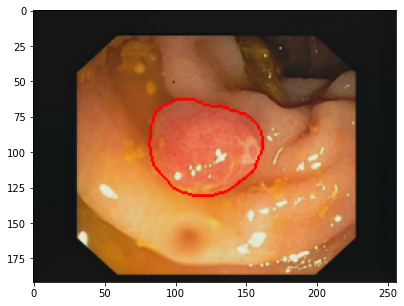

In [8]:
# Plot boundary on image
ct = 5
edges_pz = mark_boundaries(images_rs[ct], masks_rs[ct].squeeze().astype(np.int),color=(1,0,0), mode='thin')
plt.imshow(edges_pz)

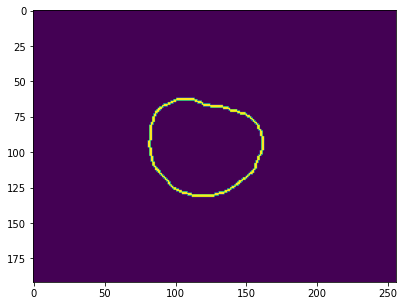

In [9]:
# Get boundary from label
a = find_boundaries(masks_rs[ct].squeeze(), mode='thick', background=0).astype(np.uint8)
plt.imshow(a)

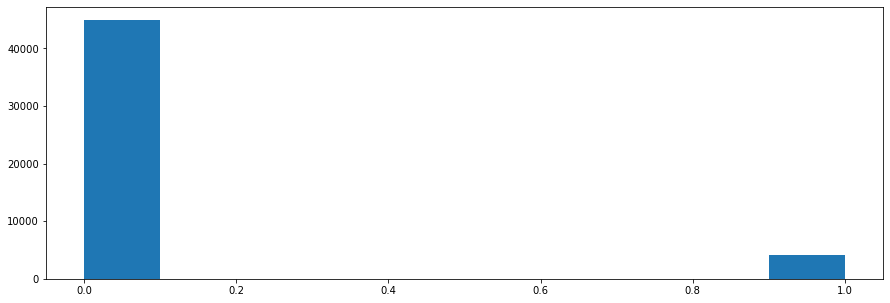

In [10]:
# Plot historgram
plt.hist(masks_rs[5].squeeze().flatten(), histtype='bar', bins=10)
plt.show()

In [11]:
# https://scikit-image.org/docs/dev/user_guide/tutorial_segmentation.html

In [12]:
images_rs.shape, masks_rs.shape

((612, 192, 256, 3), (612, 192, 256, 1))

In [13]:
np.save("{}/CVC-ClinicDB_images.npy".format(DATASET_PATH), images_rs)
np.save("{}/CVC-ClinicDB_mask.npy".format(DATASET_PATH), masks_rs)